
三个指标的准确率

准确率计算：scalar = 1 - |(x - x~) / x|
指标 |\lambda_{max}|, |\lambda_{min}|, phase_qubit_num

In [4]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('temp.csv')

# 按num_assets分组计算l_max的平均值
grouped_data = data.groupby('num_assets')[['l_max_scale', 'l_min_scale', 'qubit_num_scale']].mean().reset_index()

# 输出到另一个CSV文件
grouped_data.to_csv('output_file.csv', index=False)

In [5]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('exp_8.csv')

# 按num_assets分组计算l_max的平均值
grouped_data = data.groupby('num_assets')[['l_max_scale', 'l_min_scale', 'qubit_num_scale']].mean().reset_index()

# 输出到另一个CSV文件
grouped_data.to_csv('output_exp_8.csv', index=False)

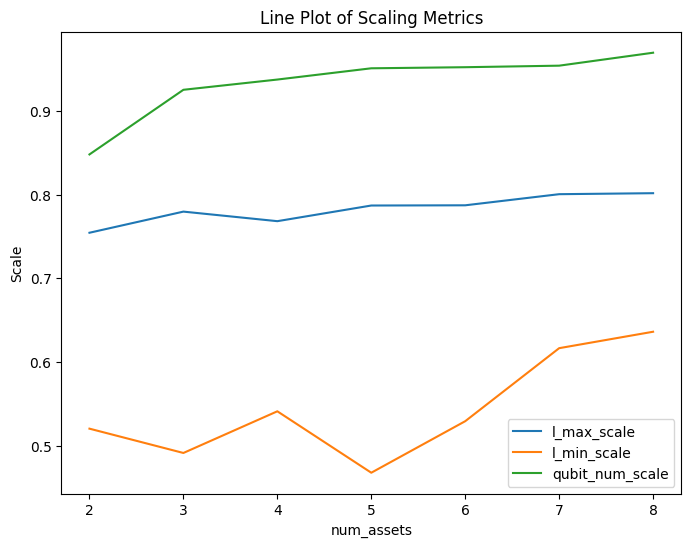

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('output_exp_8.csv')
data = data.iloc[0:7]
# 提取数据列
num_assets = data['num_assets']
l_max_scale = data['l_max_scale']
l_min_scale = data['l_min_scale']
qubit_num_scale = data['qubit_num_scale']

# 设置图形尺寸
plt.figure(figsize=(8, 6))

# 绘制折线图
plt.plot(num_assets, l_max_scale, label='l_max_scale')
plt.plot(num_assets, l_min_scale, label='l_min_scale')
plt.plot(num_assets, qubit_num_scale, label='qubit_num_scale')

# 设置标题和轴标签
plt.title('Line Plot of Scaling Metrics')
plt.xlabel('num_assets')
plt.ylabel('Scale')

# 添加图例
plt.legend()

# 显示图形
plt.show()

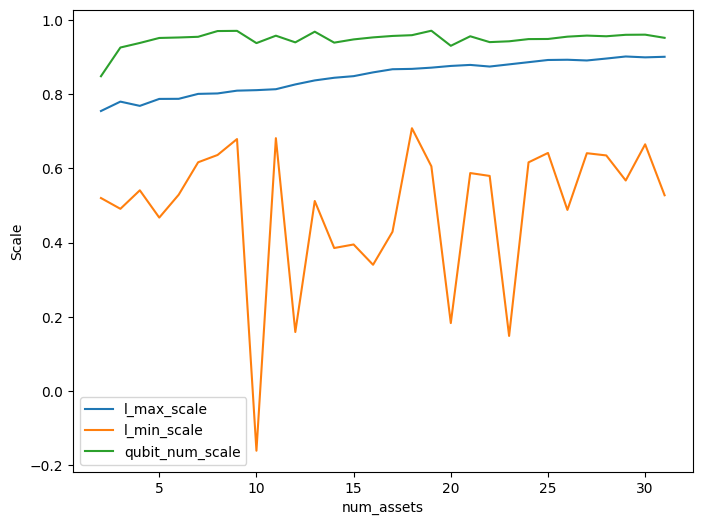

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('output_exp_8.csv')
# data = data.iloc[0:7]
# 提取数据列
num_assets = data['num_assets']
l_max_scale = data['l_max_scale']
l_min_scale = data['l_min_scale']
qubit_num_scale = data['qubit_num_scale']

# 设置图形尺寸
plt.figure(figsize=(8, 6))

# 绘制折线图
plt.plot(num_assets, l_max_scale, label='l_max_scale')
plt.plot(num_assets, l_min_scale, label='l_min_scale')
plt.plot(num_assets, qubit_num_scale, label='qubit_num_scale')

# 设置标题和轴标签
# plt.title('Line Plot of Scaling Metrics')
plt.xlabel('num_assets')
plt.ylabel('Scale')

# 添加图例
plt.legend()

# 显示图形
plt.show()

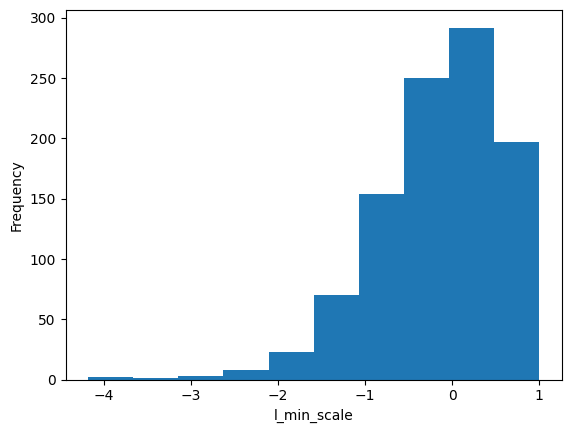

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('exp_8.csv')

# 提取'num_assets'为2的'l_max_scale'列数据
col_name = 'l_min_scale'
filtered_data = data[data['num_assets'] == 10][col_name]

# 绘制分布图
plt.hist(filtered_data)

# 设置标题和轴标签
plt.xlabel(col_name)
plt.ylabel('Frequency')

# 显示图形
plt.show()

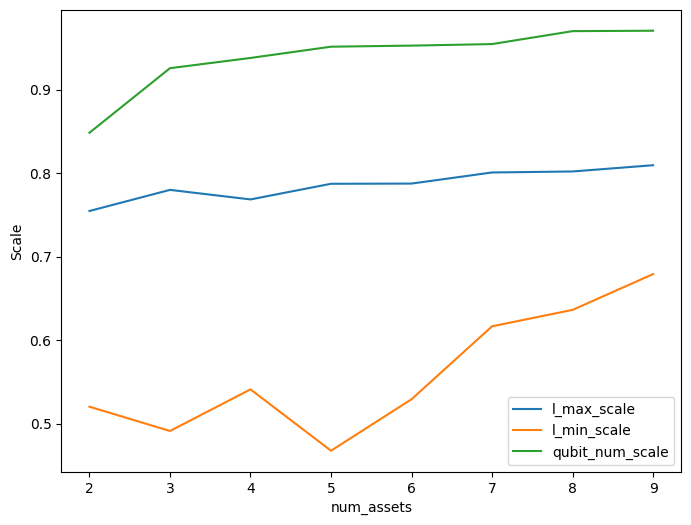

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('output_exp_8.csv')
data = data.iloc[0:8]
# 提取数据列
num_assets = data['num_assets']
l_max_scale = data['l_max_scale']
l_min_scale = data['l_min_scale']
qubit_num_scale = data['qubit_num_scale']

# 设置图形尺寸
plt.figure(figsize=(8, 6))

# 绘制折线图
plt.plot(num_assets, l_max_scale, label='l_max_scale')
plt.plot(num_assets, l_min_scale, label='l_min_scale')
plt.plot(num_assets, qubit_num_scale, label='qubit_num_scale')

# 设置标题和轴标签
# plt.title('Line Plot of Scaling Metrics')
plt.xlabel('num_assets')
plt.ylabel('Scale')

# 添加图例
plt.legend()

# 显示图形
plt.show()

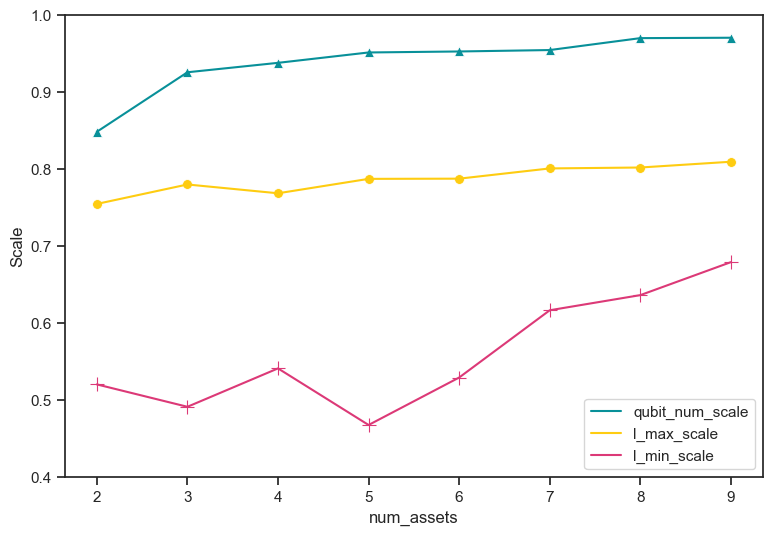

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('output_exp_8.csv')
data = data.iloc[0:8]

# 设置画布大小
fig, ax = plt.subplots(figsize=(9, 6))
# 设置seaborn风格
sns.set(style="ticks")

colors = [
    (8, 144, 153),
    (252, 222, 156),
    (220, 57, 119),
]
colors = [
    (8, 144, 153),
    (254, 204, 17),
    (220, 57, 119),
]
line_colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

# 绘制折线图
sns.lineplot(data=data, color=line_colors[0], x='num_assets', y='qubit_num_scale', label='qubit_num_scale')
sns.lineplot(data=data, color=line_colors[1], x='num_assets', y='l_max_scale', label='l_max_scale')
sns.lineplot(data=data, color=line_colors[2], x='num_assets', y='l_min_scale', label='l_min_scale')

# 绘制数据点的三角形
sns.scatterplot(data=data, x='num_assets', y='qubit_num_scale', marker='^', color=line_colors[0], s=50)
sns.scatterplot(data=data, x='num_assets', y='l_max_scale', marker='o', color=line_colors[1], s=50)
sns.scatterplot(data=data, x='num_assets', y='l_min_scale', marker='+', color=line_colors[2], s=100)

ax.set_ylim(0.4, 1)
# 自定义y轴上的数值标签
# 设置自定义的刻度数量
num_ticks = 7
# 生成等间隔的刻度值
custom_y_ticks = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_ticks)
# 自定义y轴上的刻度标签
custom_y_labels = [f'{round(tick, 1)}' for tick in custom_y_ticks]
# 设置y轴刻度
plt.yticks(custom_y_ticks, custom_y_labels)

# 设置标题和轴标签
plt.xlabel('num_assets')
plt.ylabel('Scale')

# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"temp.pdf"
plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')
# 显示图形
plt.show()

## Large

In [39]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('exp_8_large.csv')

# 按num_assets分组计算l_max的平均值
grouped_data = data.groupby('num_assets')[['l_max_scale', 'l_min_scale', 'qubit_num_scale']].mean().reset_index()

# 输出到另一个CSV文件
grouped_data.to_csv('output_exp_8_large.csv', index=False)

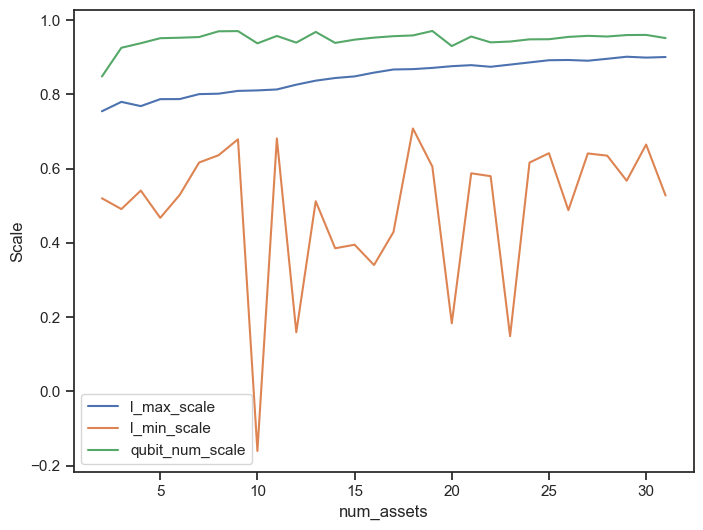

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('output_exp_8_large.csv')
# data = data.iloc[0:7]
# 提取数据列
num_assets = data['num_assets']
l_max_scale = data['l_max_scale']
l_min_scale = data['l_min_scale']
qubit_num_scale = data['qubit_num_scale']

# 设置图形尺寸
plt.figure(figsize=(8, 6))

# 绘制折线图
plt.plot(num_assets, l_max_scale, label='l_max_scale')
plt.plot(num_assets, l_min_scale, label='l_min_scale')
plt.plot(num_assets, qubit_num_scale, label='qubit_num_scale')

# 设置标题和轴标签
# plt.title('Line Plot of Scaling Metrics')
plt.xlabel('num_assets')
plt.ylabel('Scale')

# 添加图例
plt.legend()

# 显示图形
plt.show()